In [1]:
%load_ext autotime
import geopandas as gpd
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from glob import glob
from shapely.geometry import LineString, Point
import folium
pd.set_option('display.max_columns', None)

In [2]:
shorelines = gpd.read_file("Data for testing/NZCCDv1.shp")
shorelines

,Region,Site,Digitiser,Scale,Notes,Source,CPS,Proxy,Photoscale,Georef_ER,Pixel_Er,Total_UNCY,USDate,SHLength,Date,ID,geometry
0,Auckland,KarekareBethells,MW,2000,tod,RL,4,1,40000,5.03,1.416425,5.620681,01/02/2004,1.265403,2004-01-02,0.0,"LINESTRING Z (1728907.5 5916213.248 0, 1728868..."
1,Auckland,KarekareBethells,MW,2000,tod,RL,4,1,40000,5.03,1.416425,5.620681,01/02/2004,0.307010,2004-01-02,1.0,"LINESTRING Z (1729067.838 5914779.733 0, 17290..."
2,Auckland,KarekareBethells,MW,2000,tod (landward),RL,4,1,40000,5.03,1.416425,5.620681,01/02/2004,0.255243,2004-01-02,2.0,"LINESTRING Z (1729647.881 5911983.994 0, 17296..."
3,Auckland,KarekareBethells,MW,2000,tod,RL,3,1,40000,5.03,1.416425,5.314890,01/02/2004,1.107251,2004-01-02,3.0,"MULTILINESTRING Z ((1728131.079 5917218.888 0,..."
4,Auckland,KarekareBethells,MW,2000,tod,RL,4,1,40000,5.03,1.416425,5.620681,01/02/2004,0.770375,2004-01-02,4.0,"MULTILINESTRING Z ((1729643.228 5912906.682 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19661,West Coast,WoodpeckerBay,MD,1000,EdgeVeg,RL,2,1,18800,4.00,0.630693,3.736680,11/18/1948,1.191368,1948-11-18,19661.0,"LINESTRING Z (1467237.671 5348414.193 0, 14672..."
19662,Otago,Oamaru,TK,1500,Top of cliff,Max,3,2,0,2.02,0.412236,2.278429,04/04/2018,0.650952,2018-04-04,19662.0,"LINESTRING Z (1444386.944 5008247.367 0, 14443..."
19663,Otago,Oamaru,TK,1500,Top of cliff,Max,3,2,0,2.02,0.412236,2.278429,04/04/2018,0.179434,2018-04-04,19663.0,"LINESTRING Z (1444860.629 5008686.925 0, 14448..."
19664,Otago,Oamaru,TK,1500,Top of cliff,Max,3,2,0,2.02,0.412236,2.278429,04/04/2018,0.174825,2018-04-04,19664.0,"LINESTRING Z (1444996.286 5008822.252 0, 14450..."


In [3]:
transects = pd.concat(gpd.read_file(f).set_index("Unique_ID") for f in glob("Data for testing/Unique_ID_transects/*.shp"))
transects

/home/nyou045/retrolens/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
/home/nyou045/retrolens/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
/home/nyou045/retrolens/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
/home/nyou045/retrolens/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(
/home/nyou045/retrolens/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: UserWarning: M

,geometry
Unique_ID,
1.005226e+11,"LINESTRING Z (1680443.328 5669799.874 0, 16804..."
1.005226e+11,"LINESTRING Z (1680451.296 5669793.831 0, 16804..."
1.005226e+11,"LINESTRING Z (1680459.263 5669787.788 0, 16804..."
1.005227e+11,"LINESTRING Z (1680467.271 5669781.803 0, 16804..."
1.005227e+11,"LINESTRING Z (1680475.694 5669776.413 0, 16804..."
...,...
2.020008e+11,"LINESTRING Z (1616477.032 5429332.43 0, 161634..."
2.020008e+11,"LINESTRING Z (1616467.288 5429330.182 0, 16163..."
2.020008e+11,"LINESTRING Z (1616457.544 5429327.935 0, 16163..."


In [4]:
bbox = gpd.read_file("Data for testing/TestPolygon.shp")
shorelines = shorelines[shorelines.intersects(bbox.geometry[0])]
#shorelines = shorelines.clip(bbox.geometry[0])
m = shorelines.explore()
transects[transects.intersects(bbox.geometry[0])].explore(m=m, color="green")
bbox.boundary.explore(m=m)

<Axes: >

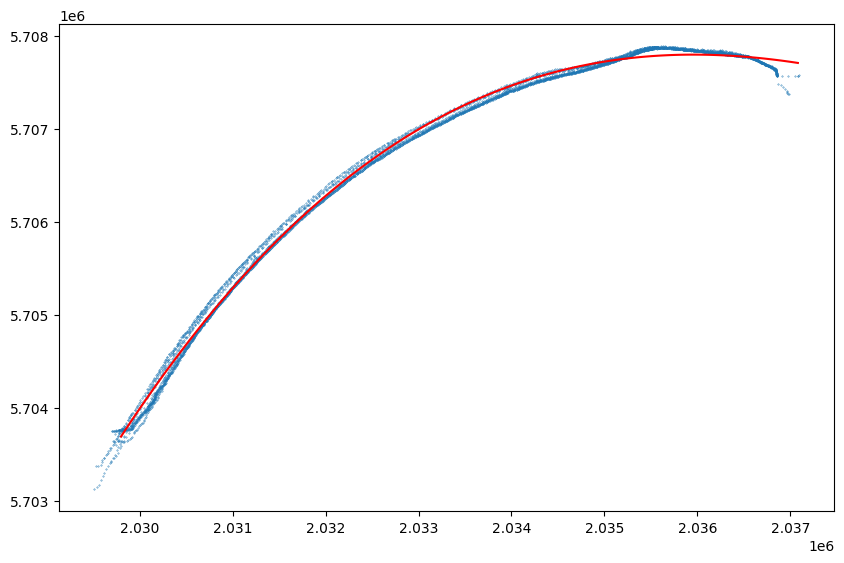

In [5]:
points = []
for shoreline in shorelines.geometry:
    points.extend([Point(p) for p in shoreline.coords])

x = np.array([p.x for p in points])
y = np.array([p.y for p in points])
coeffs = np.polyfit(x, y, 3)
minx, maxx = min(x), max(x)
x = np.arange(minx, maxx)
y = np.polyval(coeffs, x)
smoothed_shoreline = gpd.GeoSeries(LineString(zip(x, y)), crs=shorelines.crs)
smoothed_shoreline = smoothed_shoreline.clip(bbox.geometry[0])

ax = gpd.GeoSeries(points, crs=shorelines.crs).plot(figsize=(10, 10), markersize=.1)
smoothed_shoreline.plot(ax=ax, color="red")

In [6]:
def create_transects(line, spacing=10, transect_length=400):
    transects = []
    distances = np.arange(0, line.length, spacing)

    for distance in distances:
        # Find point along the average line
        point = line.interpolate(distance)
        
        # Find the direction of the line at this point (tangent direction)
        nearest_point_ahead = line.interpolate(min(distance + 1e-6, line.length))
        direction = np.arctan2(nearest_point_ahead.y - point.y, nearest_point_ahead.x - point.x)
        
        # Rotate 90 degrees (perpendicular) and extend to create a transect
        transect = LineString([
            Point(
                point.x - transect_length / 2 * np.cos(direction + np.pi / 2),
                point.y - transect_length / 2 * np.sin(direction + np.pi / 2)
            ),
            Point(
                point.x + transect_length / 2 * np.cos(direction + np.pi / 2),
                point.y + transect_length / 2 * np.sin(direction + np.pi / 2)
            )
        ])
        
        transects.append(transect)
    
    return transects

my_transects = create_transects(smoothed_shoreline.geometry.iloc[0])
my_transects = gpd.GeoDataFrame(geometry=my_transects, crs=shorelines.crs)
m = shorelines.explore(name="shorelines")
transects[transects.intersects(bbox.geometry[0])].explore(m=m, color="green", name="DSAS transects")
bbox.boundary.explore(m=m, name="bbox")
smoothed_shoreline.explore(m=m, color="red", name="polyfit shoreline")
my_transects.explore(m=m, color="red", name="generated transects")
folium.LayerControl(collapsed=False).add_to(m)
m